In [15]:
import pandas as pd
loan=pd.read_csv('../.Database/merged_cleaned_loan.csv')
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

In [16]:
loan

,annual_inc,addr_state,delinq_2yrs,dti,emp_title,emp_length,funded_amnt,grade,home_ownership,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,total_pymnt,acc_now_delinq,log_annual_inc,loan_status_grouped,issue_y,issue_m,Effective Federal Funds Rate,state_unemployment
0,24000.0,AZ,0.0,27.65,NaN,10+ years,5000,B,RENT,1.0,162.87,10.65,2011-12-01,5000,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,5861.071414,0.0,10.085809,0.0,2011,12,0.07,8.8
1,30000.0,GA,0.0,1.00,Ryder,< 1 year,2500,C,RENT,5.0,59.83,15.27,2011-12-01,2500,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,1008.710000,0.0,10.308953,1.0,2011,12,0.07,9.6
2,12252.0,IL,0.0,8.72,NaN,10+ years,2400,C,RENT,2.0,84.33,15.96,2011-12-01,2400,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,3003.653644,0.0,9.413444,0.0,2011,12,0.07,9.5
3,49200.0,CA,0.0,20.00,AIR RESOURCES BOARD,10+ years,10000,C,RENT,1.0,339.31,13.49,2011-12-01,10000,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,12226.302210,0.0,10.803649,0.0,2011,12,0.07,11.3
4,36000.0,AZ,0.0,11.20,Veolia Transportaton,3 years,5000,A,RENT,3.0,156.46,7.90,2011-12-01,5000,Fully Paid,0.0,0.0,wedding,A4,36 months,My wedding loan I promise to pay back,12.0,5631.377753,0.0,10.491274,0.0,2011,12,0.07,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257772,63078.0,PA,0.0,31.70,customer service,10+ years,17000,D,MORTGAGE,0.0,413.32,15.99,2015-01-01,17000,Fully Paid,0.0,0.0,debt_consolidation,D2,60 months,Debt consolidation,28.0,17196.520000,0.0,11.052127,0.0,2015,1,0.11,5.5
257773,48000.0,CO,0.0,36.93,supervisor,10+ years,4200,D,MORTGAGE,0.0,147.64,15.99,2015-01-01,4200,Charged Off,38.0,0.0,medical,D2,36 months,Medical expenses,45.0,1026.020000,0.0,10.778956,1.0,2015,1,0.11,4.1
257774,54000.0,FL,1.0,13.22,Coordinator of RSVP,< 1 year,10775,A,RENT,0.0,327.95,6.03,2015-01-01,10775,Fully Paid,16.0,0.0,debt_consolidation,A1,36 months,Debt consolidation,21.0,11071.870000,0.0,10.896739,0.0,2015,1,0.11,5.9
257775,27000.0,FL,0.0,18.58,Painter,2 years,6225,D,RENT,1.0,220.37,16.49,2015-01-01,6225,Fully Paid,0.0,0.0,debt_consolidation,D3,36 months,Debt consolidation,4.0,7050.460000,0.0,10.203592,0.0,2015,1,0.11,5.9


In [ ]:
# Drop non-numerical columns from X
X=loan.drop(columns=['addr_state','emp_title','loan_status','issue_d','issue_y','issue_m','title'])

# Drop annual_inc, to use log_annual_inc
X=X.drop(columns=['annual_inc'])

# Drop outcome variables from X
X=X.drop(columns=['loan_status_grouped','grade','sub_grade', 'int_rate'])

# Select outcome variable for Y
y=loan['loan_status_grouped']

In [21]:
#Separate numerical and categorical columns
categorical_columns = ['home_ownership', 'term','purpose','emp_length']
numerical_columns = X.select_dtypes(include=['float64','int64']).columns 

# Apply OneHotEncoding to categorical columns before splitting
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Ensure the train and test sets have the same structure (dummies already handled)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Apply scaling to numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Drop rows with NaN values
X_train = X_train.dropna()
X_test = X_test.dropna()

# Ensure y_train matches X_train, y_test matches X_test
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

In [7]:
# Look for the optimal k value (probably should just check recall rate)
error_rate = []
for k in range(1 ,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred)) 
# Plotting the error rate vs k values
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(np.arange(1, 20, 1))
plt.show()

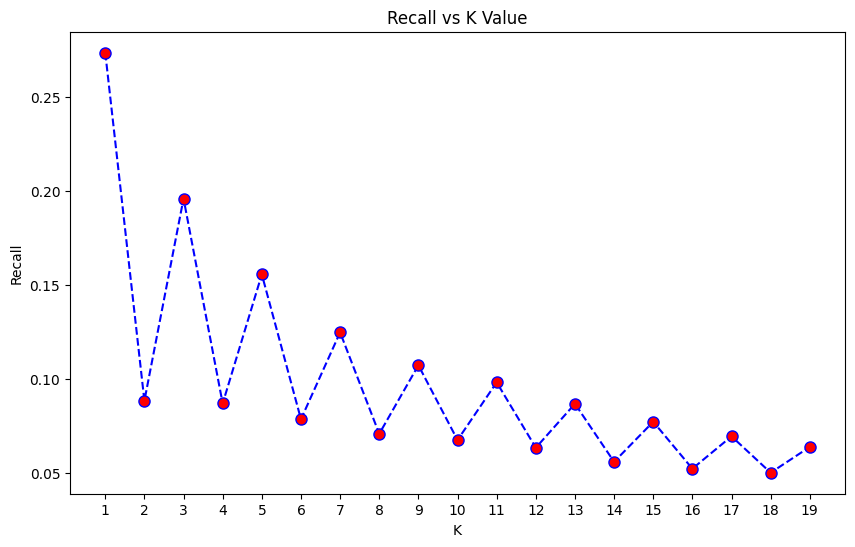

Optimal k for maximum recall: 1 with recall score: 0.274


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

# List to store recall scores for each k
recall_scores = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Fit the model with training data
    y_pred = knn.predict(X_test)  # Predict on test data
    
    # Calculate recall and add to list
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

# Plotting recall vs k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), recall_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Recall vs K Value')
plt.xlabel('K')
plt.ylabel('Recall')
plt.xticks(np.arange(1, 20, 1))
plt.show()

# Find and print the optimal k
optimal_k = np.argmax(recall_scores) + 1  # +1 because index starts at 0
print(f"Optimal k for maximum recall: {optimal_k} with recall score: {max(recall_scores):.3f}")

In [9]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print("Classification Report :")
print(     classification_report(y_test,pred_knn))

Classification Report :
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     40089
         1.0       0.88      0.38      0.53     11297

    accuracy                           0.85     51386
   macro avg       0.86      0.68      0.72     51386
weighted avg       0.86      0.85      0.83     51386



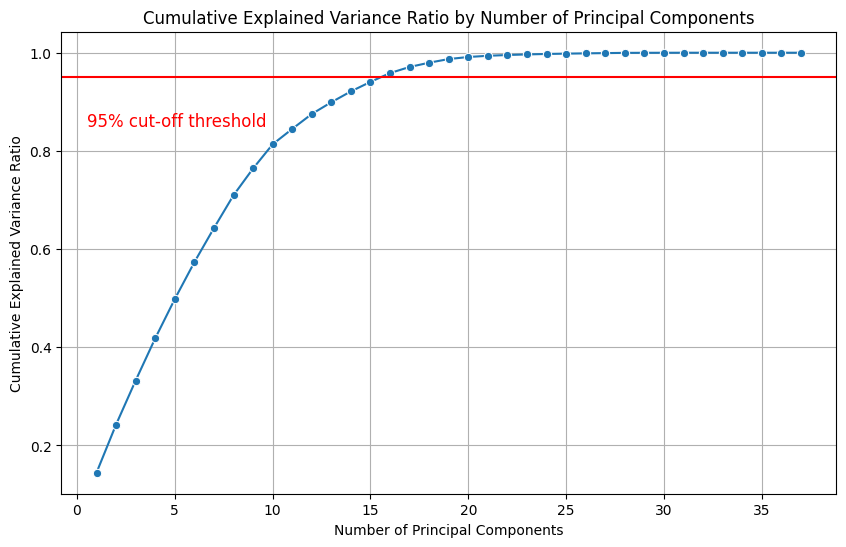

In [24]:
#Try PCA
pca = PCA(n_components=len(X_train.columns))
pca.fit(X_train)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

cvr = pd.DataFrame({'Number of Principal Components': range(1, len(cumulative_variance_ratio) + 1),'Cumulative Explained Variance Ratio': cumulative_variance_ratio})

plt.figure(figsize=(10, 6))
sns.lineplot(data=cvr, x='Number of Principal Components', y='Cumulative Explained Variance Ratio', marker='o') 

plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)

plt.grid(True)
plt.show()

In [26]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca,y_train)
pred_knn = knn.predict(X_test_pca)
print("Classification Report :")
print(     classification_report(y_test,pred_knn))

Classification Report :
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86     40173
         1.0       0.39      0.14      0.20     11203

    accuracy                           0.76     51376
   macro avg       0.59      0.54      0.53     51376
weighted avg       0.71      0.76      0.72     51376



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [ 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Grid search to find the best parameters
# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
# grid.fit(X_train, y_train)

# # Best parameters and accuracy
# print(grid.best_params_)
# print(grid.best_score_)

random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid, n_iter=5, refit=True, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and accuracy
print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 6.1min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 6.2min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 6.1min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 6.1min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 6.0min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=27.4min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=25.0min


In [36]:
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96     10809
         1.0       0.98      1.00      0.99     40517

    accuracy                           0.98     51326
   macro avg       0.99      0.96      0.97     51326
weighted avg       0.98      0.98      0.98     51326

Confusion Matrix:
[[ 9958   851]
 [   84 40433]]


In [35]:
y_test

248914    1.0
95509     0.0
146705    1.0
99274     0.0
172020    0.0
         ... 
66089     1.0
47763     1.0
190194    1.0
16835     1.0
246572    1.0
Name: loan_status_grouped, Length: 51326, dtype: float64